In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
cc = pd.read_csv("simulation/simulate.recount", sep = "\t")
cc['id'] = [x[:-17] for x in cc['circRNA']]
cc = cc[['id', 'bsj_count']]
cc.columns = ['id', 'cc_bsj']

In [3]:
gt = pd.read_csv("simulation/simulate_info.txt", sep="\t")
gt['id'] = gt['normID']
gt = gt[['id', 'cCount']]
gt_count = gt
gt_count.columns = ['id', 'gt']

In [6]:
cq = pd.read_csv('simulation/simulate.bed', sep='\t', header = None)
cq['id'] = [i.replace(':', '__').replace('|', '__') for i in cq[3]]
cq = cq[[5, 'id']]
cq.columns = ['cq_bsj', 'id']

In [7]:
m = pd.merge(gt_count, cc, on = 'id', how='left')

In [8]:
m = pd.merge(m, cq, on = 'id', how='left')

In [9]:
m = m.fillna(0)

In [10]:
m['gt_log2'] = np.log2(m['gt'] + 1)
m['cc_bsj_log2'] = np.log2(m['cc_bsj'] + 1)
m['cq_bsj_log2'] = np.log2(m['cq_bsj'] + 1)

In [11]:
r_cc = round(np.corrcoef(m['gt_log2'], m['cc_bsj_log2'])[0,1],4)

In [12]:
r_cc

0.9383

In [13]:
r_cq = round(np.corrcoef(m['gt_log2'], m['cq_bsj_log2'])[0,1],4)

In [14]:
r_cq

0.9184

In [15]:
r_cc_cq = round(np.corrcoef(m['cc_bsj_log2'], m['cq_bsj_log2'])[0,1],4)

In [16]:
r_cc_cq

0.9742

In [18]:
## run time - manual input
Method = ['Circall_quant', 'CIRIquant']
Minute = [9, 46]

/var/folders/dy/3708l0gn12z7ns1f72f3c9bw0000gn/T/ipykernel_84552/3775617106.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = m, x="gt_log2", y="cc_bsj_log2", cmap="Blues", shade=True, ax=axes[0,0])
/var/folders/dy/3708l0gn12z7ns1f72f3c9bw0000gn/T/ipykernel_84552/3775617106.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = m, x="gt_log2", y="cq_bsj_log2", cmap="Blues", shade=True, ax=axes[0,1])
/var/folders/dy/3708l0gn12z7ns1f72f3c9bw0000gn/T/ipykernel_84552/3775617106.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = m, x="cc_bsj_log2", y="cq_bsj_log2", cmap="Blues", shade=True, ax=axes[1,0]

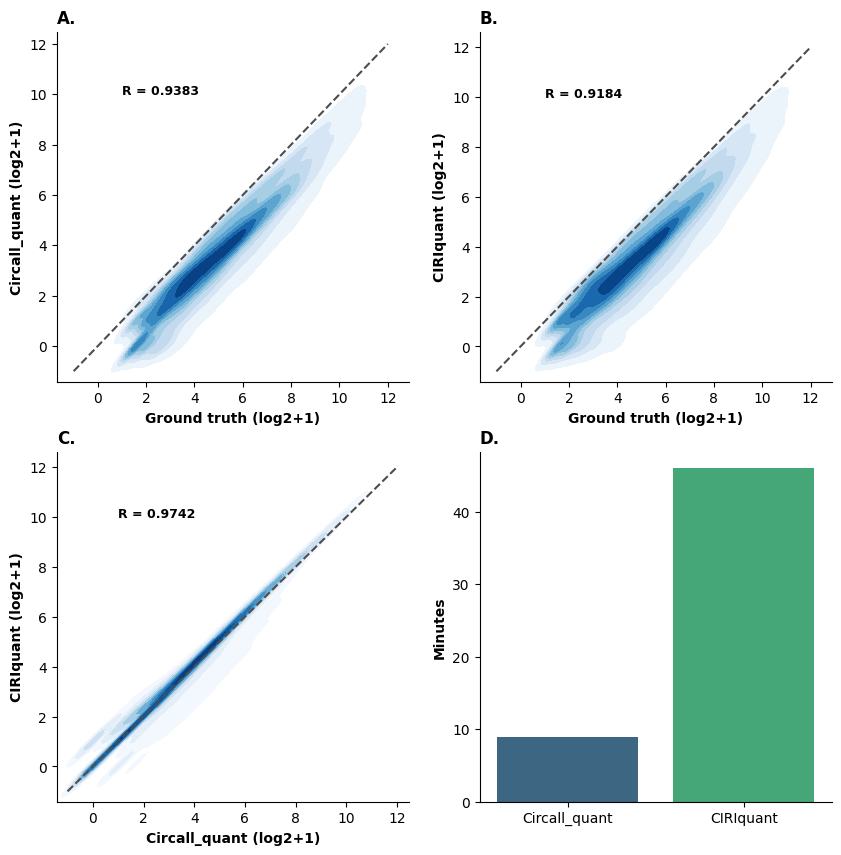

In [25]:
fig, axes = plt.subplots(2,2, figsize=(10, 10))
sns.kdeplot(data = m, x="gt_log2", y="cc_bsj_log2", cmap="Blues", shade=True, ax=axes[0,0])
sns.despine(top = True, right = True)
axes[0,0].set_title("A.", loc='left', weight='bold')
axes[0,0].set_xlabel("Ground truth (log2+1)", weight='bold')
axes[0,0].set_ylabel("Circall_quant (log2+1)", weight='bold')
axes[0,0].plot([-1, 12], [-1, 12], ls="--", c=".3")
axes[0,0].text(1, 10, f'R = {r_cc}', fontsize=9, color="black", weight='bold')


sns.kdeplot(data = m, x="gt_log2", y="cq_bsj_log2", cmap="Blues", shade=True, ax=axes[0,1])
sns.despine(top = True, right = True)
axes[0,1].set_title("B.", loc='left', weight='bold')
axes[0,1].set_xlabel("Ground truth (log2+1)", weight='bold')
axes[0,1].set_ylabel("CIRIquant (log2+1)", weight='bold')
axes[0,1].plot([-1, 12], [-1, 12], ls="--", c=".3")
axes[0,1].text(1, 10, f'R = {r_cq}', fontsize=9, color="black", weight='bold')

sns.kdeplot(data = m, x="cc_bsj_log2", y="cq_bsj_log2", cmap="Blues", shade=True, ax=axes[1,0])
sns.despine(top = True, right = True)
axes[1,0].set_title("C.", loc='left', weight='bold')
axes[1,0].set_xlabel("Circall_quant (log2+1)", weight='bold')
axes[1,0].set_ylabel("CIRIquant (log2+1)", weight='bold')
axes[1,0].plot([-1, 12], [-1, 12], ls="--", c=".3")
axes[1,0].text(1, 10, f'R = {r_cc_cq}', fontsize=9, color="black", weight='bold')

#sns.barplot(x=values, y=categories, palette="viridis")
sns.barplot(x = Method, y = Minute, ax = axes[1,1], palette="viridis")
sns.despine(top = True, right = True)
axes[1,1].set_title('D.', loc='left', weight='bold')
axes[1,1].set_ylabel("Minutes", weight='bold')

plt.savefig('output_paper/S3_revise.pdf', format='pdf')
